In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Dataset #1: Iranian Customer Telco Churn

The dataset contains 13 features and 3150 rows and is about the customers of a telecommunication company in Iran. The company wants to predict the churn of its customers. The dataset contains the following features:

- Call Failures: the number of call failures the customer has experienced in the past 9 months
- Complains: the number of complaints the customer has made in the past 9 months
- Subscription Length: the length of the customer's subscription in months
- Charge Amount: the amount of money the customer has been charged in the past 9 months, discretized into 10 bins
- Seconds of Use: the number of seconds of calls the customer has used in the past 9 months
- Frequency of use: total number of calls the customer has made in the past 9 months
- Frequency of SMS: total number of SMS the customer has sent in the past 9 months
- Distinct Called Numbers: the number of distinct phone numbers the customer has called in the past 9 months
- Age Group: the age group of the customer, discretized into 5 bins
- Tariff Plan: the tariff plan of the customer, binary (1: Pay as you go, 2: contract)
- Status: the status of the customer, binary (1: churn, 2: not churn)
- Customer Value: the calculated value of the customer

### Target
- Churn: the target variable, binary (1: churn, 0: not churn)


In [218]:
df_churn = pd.read_csv('Customer Churn.csv')
df_churn.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


In [219]:
df_churn['Churn'].value_counts()/df_churn.shape[0]

Churn
0    0.842857
1    0.157143
Name: count, dtype: float64

In [220]:
df_churn.isna().sum()

Call  Failure              0
Complains                  0
Subscription  Length       0
Charge  Amount             0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Status                     0
Age                        0
Customer Value             0
Churn                      0
dtype: int64

In [221]:
cols_cat_binary = ['Tariff Plan', 'Status']

df_churn = pd.get_dummies(df_churn, columns=cols_cat_binary, drop_first=True)

df_churn.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Age,Customer Value,Churn,Tariff Plan_2,Status_2
0,8,0,38,0,4370,71,5,17,3,30,197.640,0,False,False
1,0,0,39,0,318,5,7,4,2,25,46.035,0,False,True
2,10,0,37,0,2453,60,359,24,3,30,1536.520,0,False,False
3,10,0,38,0,4198,66,1,35,1,15,240.020,0,False,False
4,3,0,38,0,2393,58,2,33,1,15,145.805,0,False,False


# Dataset #2: Wine Quality

The Wine Quality Data Set from the UCI Machine Learning Repository is used for this project. The dataset contains information about the quality of red and white variants of the Portuguese "Vinho Verde" wine. The goal is to predict the quality of the wine. The dataset can be found here: https://archive.ics.uci.edu/ml/datasets/Wine+Quality

## Input variables (based on physicochemical tests):

1) is_red (red or white)
2) fixed acidity
3) volatile acidity
4) citric acid
5) residual sugar
6) chlorides
7) free sulfur dioxide
8) total sulfur dioxide
9) density
10) pH
11) sulphates
12) alcohol

## Output variable (based on sensory data):
13) quality (score between 0 and 10)


In [217]:
df_wine_red = pd.read_csv('winequality-red.csv', sep=';')
df_wine_white = pd.read_csv('winequality-white.csv', sep=';')

df_wine_red['is_red'] = 1
df_wine_white['is_red'] = 0

df_wine = pd.concat([df_wine_red, df_wine_white], axis=0)
df_wine['quality'] = df_wine['quality'].map(lambda x: 1 if x >= 7 else 0)
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,1


In [147]:
df_wine['quality'].value_counts()/df_wine.shape[0]

quality
0    0.803448
1    0.196552
Name: count, dtype: float64

# Model Evaluation and Metrics

In [222]:
models = {'SVM': SVC(probability=True, cache_size=2000, kernel='rbf'),
          'LinearSVC': LinearSVC(dual=False, max_iter=1000),
          'Decision Tree': DecisionTreeClassifier(),
          'Gradient Boosting': GradientBoostingClassifier(),
          'KNN': KNeighborsClassifier(),
          'Neural Network': MLPClassifier()}

hyperparam_search = {'SVM': {'C': [0.01, 0.1, 0.5, 0.7, 1]},
                     'LinearSVC': {'C': [0.01, 0.1, 0.5, 0.7, 1]},
                     'Decision Tree': {'max_depth': [2, 3, 5, 7, 10, 12, 14, 16, 18, 20, 23, 25, 30, None],
                                       'criterion': ['gini', 'entropy']},
                     'Gradient Boosting': {'learning_rate': [0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8],
                                             'max_depth': [2, 5, 7, 10, 15, None]},
                     'KNN': {'n_neighbors': [1, 3, 7, 9, 19, 29, 39, 49, 59, 69, 79, 89, 99]},
                     'Neural Network': {'hidden_layer_sizes': [(2,), (3,), (5,), (7,), (9,),
                                                               (10,), (20,), (30,), (40,), (50,),
                                                               (60,), (70,), (80,), (90,), (100,),
                                                               (2, 2), (3, 3), (4, 4), (5, 5), (6, 6),
                                                               (7, 7), (8, 8), (9, 9), (10, 10)],
                                        'alpha': [0.001, 0.1, 1],
                                        'activation': ['relu'],
                                        'solver': ['adam']}}

sample_sizes = [0.5, 0.01, 0.1, 0.8, 1.0]

def fix_svm_linear_svc(df_results):
    df_svm = df_results[df_results['model'].isin(['SVM', 'LinearSVC'])]
    df_svm['best_auc_group'] = df_svm.groupby(['sample_size'])['test_auc'].transform('max')
    df_svm = df_svm[df_svm['test_auc'] == df_svm['best_auc_group']]
    df_svm['kernel'] = df_svm['model'].map({'SVM': 'rbf', 'LinearSVC': 'linear'})
    df_svm['best_hyperparams'] = df_svm.apply(lambda x: {**x['best_hyperparams'], 'kernel': x['kernel']}, axis=1)
    df_svm = df_svm.drop(columns=['kernel', 'best_auc_group'])
    df_svm['model'] = 'SVM'
    
    df_results = df_results[~df_results['model'].isin(['SVM', 'LinearSVC'])]
    df_results = pd.concat([df_results, df_svm], axis=0)
    return df_results
    

def eval_models_on_df(df, df_name, target, models, hyperparams,
                      sample_sizes, repeat_times, cv_folds=3):
    
    print('Evaluating models on {} dataset'.format(df_name))
    print('Target variable: {}'.format(target))
    print('{} sample sizes, cross-validation with {} folds.'.format(len(sample_sizes), cv_folds))
    
    best_hyperparams = {}
    results = []
    grid_results = {}
    
    
    for iter_sample, sample in enumerate(sample_sizes):
        print('Sample fraction: {}'.format(sample))
        # stratified sampling on target variable
        df_sample = (df.groupby(target, group_keys=False)
                       .apply(lambda x: x.sample(frac=sample, random_state=42)))
        
        X, y = df_sample.drop(target, axis=1), df_sample[target]
        
        # split into train and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
        
        for model_name, model in models.items():
            print('Model: {}'.format(model_name))
            
            # will only do hyperparameter tuning for the first sample size (50%)
            if iter_sample == 0:
                print('Hyperparameter tuning...')
                grid = GridSearchCV(model, hyperparams[model_name], 
                                    scoring='roc_auc', cv=cv_folds, 
                                    n_jobs=6)
                grid.fit(X_train, y_train)
                best_hyperparams[model_name] = grid.best_params_
                print('Best hyperparameters: {}'.format(grid.best_params_))
                cv_results = pd.DataFrame(grid.cv_results_)
                cv_results['model'] = model_name
                cv_results['dataset'] = df_name
                grid_results[model_name] = cv_results
                

            # train model with best hyperparameters
            model.set_params(**best_hyperparams[model_name])
            start = time.time()
            model.fit(X_train, y_train)
            end = time.time()
            train_time = end - start
            try:
                y_pred = model.predict(X_test)
            except ValueError:
                continue
            
            # calculate train metrics
            train_rep = classification_report(y_train, model.predict(X_train), output_dict=True)['macro avg']
            train_precision, train_recall, train_f1 = train_rep['precision'], train_rep['recall'], train_rep['f1-score']
            train_acc = accuracy_score(y_train, model.predict(X_train))
            train_auc = roc_auc_score(y_train, model.predict(X_train))

            # calculate test metrics
            test_rep = classification_report(y_test, y_pred, output_dict=True)['macro avg']
            test_precision, test_recall, test_f1 = test_rep['precision'], test_rep['recall'], test_rep['f1-score']
            test_acc = accuracy_score(y_test, y_pred)
            test_auc = roc_auc_score(y_test, y_pred)

                
            scores = {'dataset': df_name,
                    'sample_size': sample,
                    'model': model_name,
                    'train_time': train_time,
                    'train_precision': train_precision,
                    'train_recall': train_recall,
                    'train_f1': train_f1,
                    'train_acc': train_acc,
                    'train_auc': train_auc,
                    'test_precision': test_precision,
                    'test_recall': test_recall,
                    'test_f1': test_f1,
                    'test_acc': test_acc,
                    'test_auc': test_auc,
                    'best_hyperparams': best_hyperparams[model_name]}
            
            results.append(scores)     
            
    df_results = pd.DataFrame(results)
    # save results to parquet
    timestamp = time.strftime('%Y%m%d-%H%M%S')
    df_results = fix_svm_linear_svc(df_results)
    df_results.to_parquet('results_{}-{}.parquet'.format(df_name, timestamp))
    
    for model_name, grid_result in grid_results.items():
        grid_result.to_parquet('grid_results_{}-{}-{}.parquet'.format(df_name, model_name, timestamp))
    return df_results, grid_results
           
        
        

In [223]:
df_results_churn, grid_churn = eval_models_on_df(df_churn, 'churn', 'Churn', models, hyperparam_search, sample_sizes, 3)

Evaluating models on churn dataset
Target variable: Churn
5 sample sizes, cross-validation with 3 folds.
Sample fraction: 0.5
Model: SVM
Hyperparameter tuning...


/var/folders/97/5mm__k0x21zdkn755g5n6yh80000gp/T/ipykernel_82069/1346645514.py:56: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(frac=sample, random_state=42)))


Best hyperparameters: {'C': 0.7}
Model: LinearSVC
Hyperparameter tuning...
Best hyperparameters: {'C': 0.5}
Model: Decision Tree
Hyperparameter tuning...


/Users/lsantos/OMSCS/CS7641 - Machine Learning/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lsantos/OMSCS/CS7641 - Machine Learning/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lsantos/OMSCS/CS7641 - Machine Learning/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi

Best hyperparameters: {'criterion': 'entropy', 'max_depth': 5}
Model: Gradient Boosting
Hyperparameter tuning...
Best hyperparameters: {'learning_rate': 0.4, 'max_depth': 5}
Model: KNN
Hyperparameter tuning...
Best hyperparameters: {'n_neighbors': 29}
Model: Neural Network
Hyperparameter tuning...


/Users/lsantos/OMSCS/CS7641 - Machine Learning/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lsantos/OMSCS/CS7641 - Machine Learning/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lsantos/OMSCS/CS7641 - Machine Learning/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lsantos/OMSCS/CS7641 - Machine Learning/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum i

Best hyperparameters: {'activation': 'relu', 'alpha': 1, 'hidden_layer_sizes': (90,), 'solver': 'adam'}
Sample fraction: 0.01
Model: SVM
Model: LinearSVC
Model: Decision Tree
Model: Gradient Boosting


/var/folders/97/5mm__k0x21zdkn755g5n6yh80000gp/T/ipykernel_82069/1346645514.py:56: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(frac=sample, random_state=42)))
/Users/lsantos/OMSCS/CS7641 - Machine Learning/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lsantos/OMSCS/CS7641 - Machine Learning/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is

Model: KNN
Model: Neural Network
Sample fraction: 0.1
Model: SVM
Model: LinearSVC
Model: Decision Tree
Model: Gradient Boosting
Model: KNN


/Users/lsantos/OMSCS/CS7641 - Machine Learning/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lsantos/OMSCS/CS7641 - Machine Learning/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lsantos/OMSCS/CS7641 - Machine Learning/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi

Model: Neural Network
Sample fraction: 0.8
Model: SVM


/Users/lsantos/OMSCS/CS7641 - Machine Learning/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lsantos/OMSCS/CS7641 - Machine Learning/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lsantos/OMSCS/CS7641 - Machine Learning/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi

Model: LinearSVC
Model: Decision Tree
Model: Gradient Boosting
Model: KNN
Model: Neural Network
Sample fraction: 1.0
Model: SVM


/var/folders/97/5mm__k0x21zdkn755g5n6yh80000gp/T/ipykernel_82069/1346645514.py:56: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(frac=sample, random_state=42)))
/Users/lsantos/OMSCS/CS7641 - Machine Learning/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lsantos/OMSCS/CS7641 - Machine Learning/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is

Model: LinearSVC
Model: Decision Tree
Model: Gradient Boosting
Model: KNN
Model: Neural Network


/var/folders/97/5mm__k0x21zdkn755g5n6yh80000gp/T/ipykernel_82069/1346645514.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_svm['best_auc_group'] = df_svm.groupby(['sample_size'])['test_auc'].transform('max')


In [224]:
df_results_wine, grid_wine = eval_models_on_df(df_wine, 'wine', 'quality', models, hyperparam_search, sample_sizes, 3)

Evaluating models on wine dataset
Target variable: quality
5 sample sizes, cross-validation with 3 folds.
Sample fraction: 0.5
Model: SVM
Hyperparameter tuning...


/var/folders/97/5mm__k0x21zdkn755g5n6yh80000gp/T/ipykernel_82069/1346645514.py:56: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(frac=sample, random_state=42)))


Best hyperparameters: {'C': 1}


/Users/lsantos/OMSCS/CS7641 - Machine Learning/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lsantos/OMSCS/CS7641 - Machine Learning/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lsantos/OMSCS/CS7641 - Machine Learning/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi

Model: LinearSVC
Hyperparameter tuning...
Best hyperparameters: {'C': 1}
Model: Decision Tree
Hyperparameter tuning...
Best hyperparameters: {'criterion': 'gini', 'max_depth': 3}
Model: Gradient Boosting
Hyperparameter tuning...
Best hyperparameters: {'learning_rate': 0.5, 'max_depth': 10}
Model: KNN
Hyperparameter tuning...
Best hyperparameters: {'n_neighbors': 7}
Model: Neural Network
Hyperparameter tuning...


/Users/lsantos/OMSCS/CS7641 - Machine Learning/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lsantos/OMSCS/CS7641 - Machine Learning/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lsantos/OMSCS/CS7641 - Machine Learning/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lsantos/OMSCS/CS7641 - Machine Learning/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum i

Best hyperparameters: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (90,), 'solver': 'adam'}
Sample fraction: 0.01
Model: SVM
Model: LinearSVC
Model: Decision Tree
Model: Gradient Boosting
Model: KNN
Model: Neural Network
Sample fraction: 0.1
Model: SVM
Model: LinearSVC
Model: Decision Tree
Model: Gradient Boosting


/var/folders/97/5mm__k0x21zdkn755g5n6yh80000gp/T/ipykernel_82069/1346645514.py:56: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(frac=sample, random_state=42)))
/Users/lsantos/OMSCS/CS7641 - Machine Learning/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lsantos/OMSCS/CS7641 - Machine Learning/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is

Model: KNN
Model: Neural Network


/Users/lsantos/OMSCS/CS7641 - Machine Learning/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/var/folders/97/5mm__k0x21zdkn755g5n6yh80000gp/T/ipykernel_82069/1346645514.py:56: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(frac=sample, random_state=42)))


Sample fraction: 0.8
Model: SVM


/Users/lsantos/OMSCS/CS7641 - Machine Learning/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lsantos/OMSCS/CS7641 - Machine Learning/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lsantos/OMSCS/CS7641 - Machine Learning/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi

Model: LinearSVC
Model: Decision Tree
Model: Gradient Boosting
Model: KNN
Model: Neural Network
Sample fraction: 1.0
Model: SVM


/var/folders/97/5mm__k0x21zdkn755g5n6yh80000gp/T/ipykernel_82069/1346645514.py:56: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(frac=sample, random_state=42)))
/Users/lsantos/OMSCS/CS7641 - Machine Learning/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lsantos/OMSCS/CS7641 - Machine Learning/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is

Model: LinearSVC
Model: Decision Tree
Model: Gradient Boosting
Model: KNN
Model: Neural Network


/var/folders/97/5mm__k0x21zdkn755g5n6yh80000gp/T/ipykernel_82069/1346645514.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_svm['best_auc_group'] = df_svm.groupby(['sample_size'])['test_auc'].transform('max')


# Plots

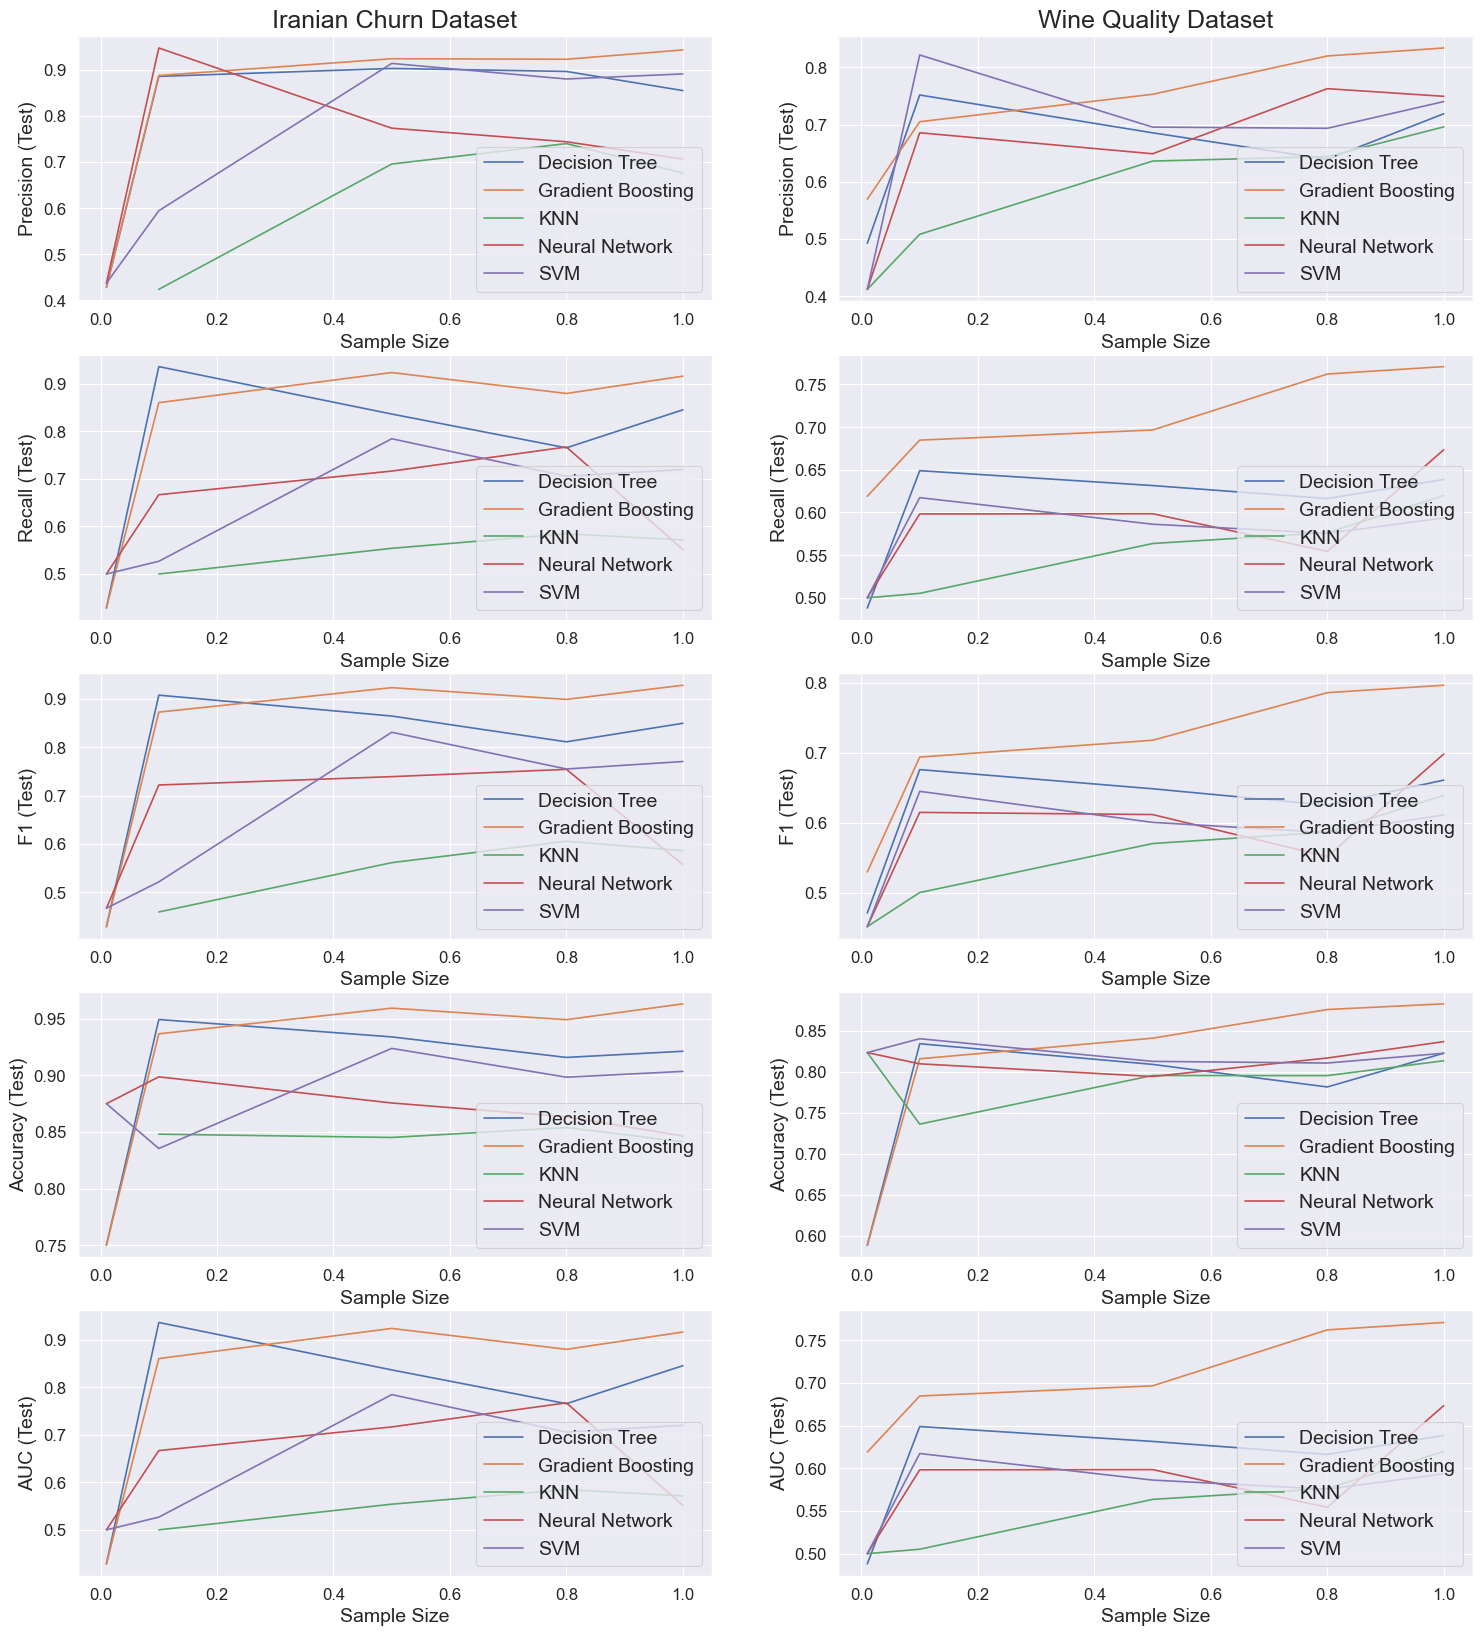

In [225]:
sns.set_theme()
sns.set_context('paper')
fig, axs = plt.subplots(5, 2, figsize=(18, 20))
dfs = [df_results_churn, df_results_wine]
df_names = ['Iranian Churn Dataset', 'Wine Quality Dataset']
metrics = ['test_precision', 'test_recall', 'test_f1', 'test_acc', 'test_auc']
metrics_labels = ['Precision (Test)', 'Recall (Test)', 'F1 (Test)', 'Accuracy (Test)', 'AUC (Test)']
tick_fontsize = 12
small_fontsize = 14
large_fontsize = 18
for i, df in enumerate(dfs):
    for j, metric in enumerate(metrics):
        sns.lineplot(x='sample_size', y=metric, hue='model', 
                     data=df, ax=axs[j, i], markers=True)
        axs[0, i].set_title(df_names[i], fontsize=large_fontsize)
        #axs[0, i].title.set_size(large_fontsize)
        axs[j, i].set_xlabel('Sample Size', fontsize=small_fontsize)
        # set x_ticks to be the sample sizes
        #axs[j, i].set_xticks(sorted(sample_sizes))
        #axs[j, i].set_yticks([0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
        axs[j, i].tick_params(axis='both', labelsize=tick_fontsize)
        axs[j, i].set_ylabel(metrics_labels[j], fontsize=small_fontsize)
        axs[j, i].legend(loc='lower right', fontsize=small_fontsize)

#axs[0, 0].legend(loc='upper right')
plt.savefig('model_comparison.png', dpi=400)
plt.show()

In [226]:
metric = 'mean_test_score'
model_results = [grid_churn[model] for model in models.keys()]
params = {'Decision Tree': ['max_depth', 'criterion'],
          'Gradient Boosting': ['learning_rate', 'max_depth'], 
          'KNN': ['n_neighbors'], 
          'Neural Network': ['hidden_layer_sizes', 'alpha'], 
          'SVM': ['C'], 'LinearSVC': ['C']}


model_params = [(model, param) for model in models.keys() for param in params[model]]


/var/folders/97/5mm__k0x21zdkn755g5n6yh80000gp/T/ipykernel_82069/1164686362.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_results['param_hidden_layer_sizes'] = model_results['param_hidden_layer_sizes'].apply(lambda x: x[0])
/var/folders/97/5mm__k0x21zdkn755g5n6yh80000gp/T/ipykernel_82069/1164686362.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_results['param_hidden_layer_sizes'] = model_results['param_hidden_layer_sizes'].apply(lambda x: x[0])


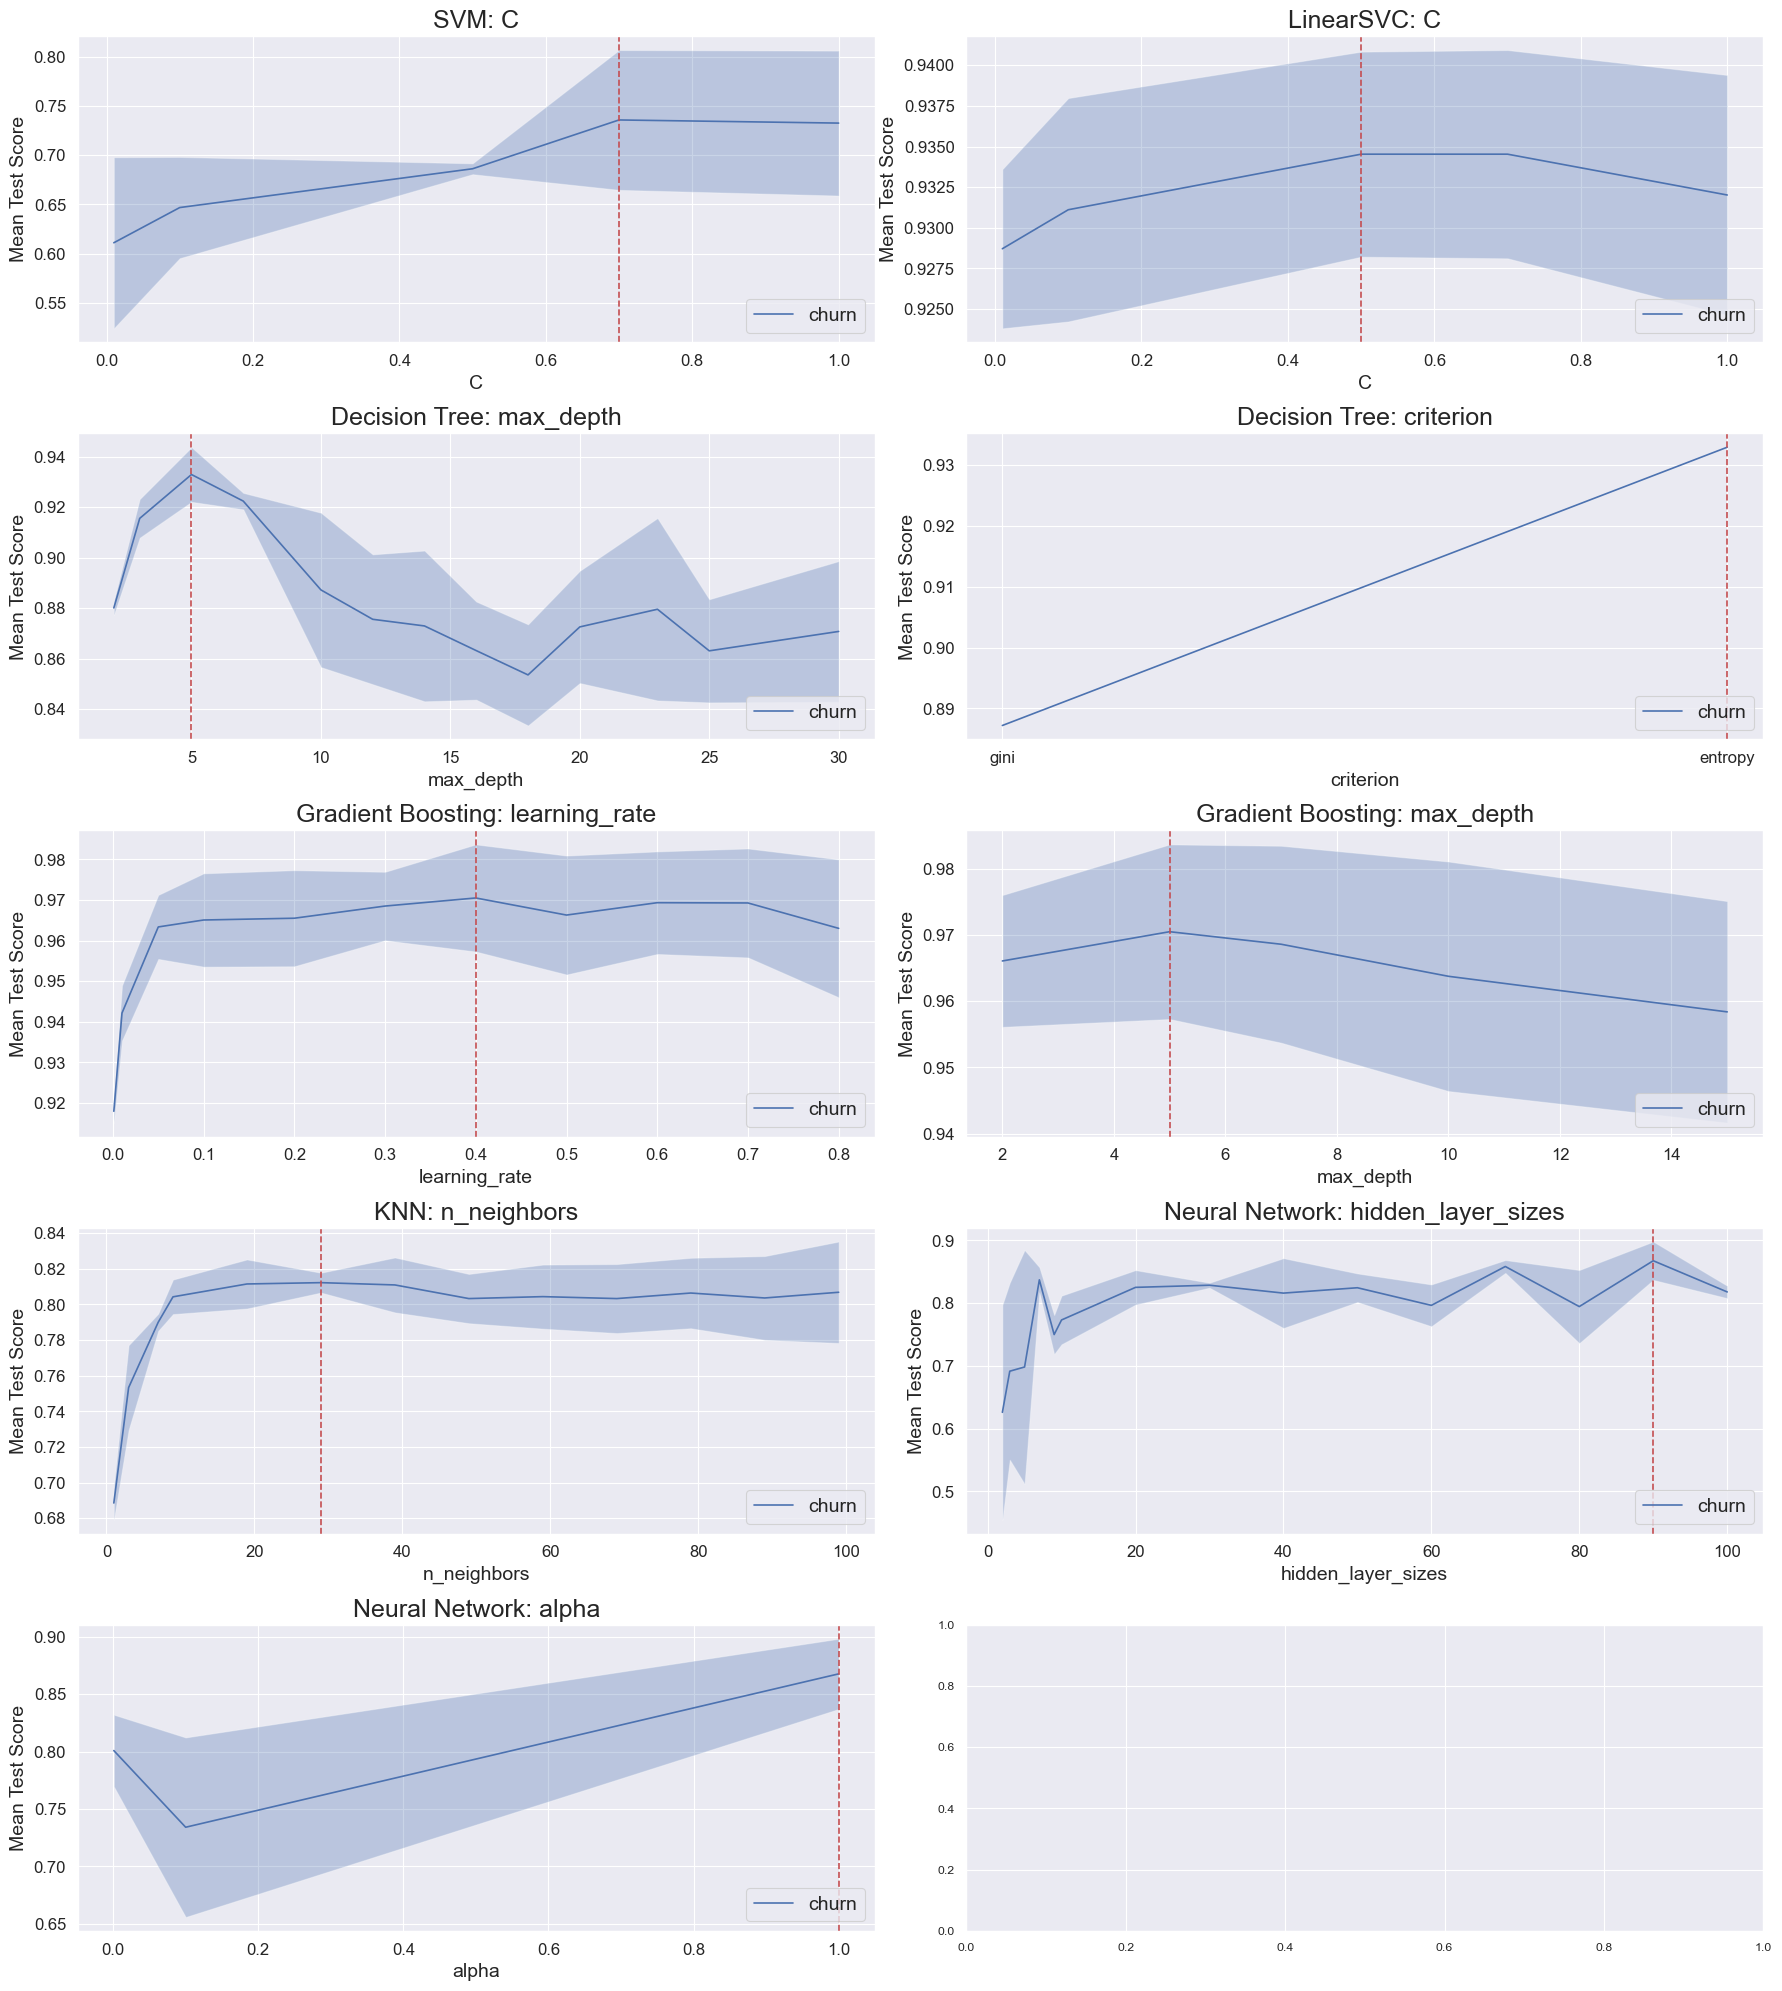

In [227]:

sns.set_theme()
sns.set_context('paper')
fig, axs = plt.subplots(5, 2, figsize=(18, 20))
for i, (model, param) in enumerate(model_params):
    model_results = grid_churn[model]
    
    if model == 'Neural Network':
        model_results = model_results[model_results['param_hidden_layer_sizes'].apply(len) == 1]
        model_results['param_hidden_layer_sizes'] = model_results['param_hidden_layer_sizes'].apply(lambda x: x[0])
    
    best_params = model_results[model_results['mean_test_score'] == model_results['mean_test_score'].max()]
    best_params = best_params[[c for c in best_params.columns if c.startswith('param_')]]
    best_param = best_params['param_{}'.format(param)].iloc[0]
    best_params = best_params.drop(columns=['param_{}'.format(param)]).iloc[0].to_dict()
    
    # filter model results to only show the best hyperparameters from best_params
    for k, v in best_params.items():
        model_results = model_results[model_results[k] == v]
       
    
    sns.lineplot(x='param_{}'.format(param), y=metric, hue='dataset', 
                 data=model_results, ax=axs[i//2, i%2], markers=True, errorbar=None)
    
    try:
        axs[i//2, i%2].fill_between(np.array(model_results['param_{}'.format(param)], dtype=float),
                        (model_results['mean_test_score'] - model_results['std_test_score']).to_numpy(), 
                        (model_results['mean_test_score'] + model_results['std_test_score']).to_numpy(), alpha=0.3)
    except ValueError:
        pass
    
    axs[i//2, i%2].set_title('{}: {}'.format(model, param), fontsize=large_fontsize)
    axs[i//2, i%2].set_xlabel(param, fontsize=small_fontsize)
    axs[i//2, i%2].set_ylabel('Mean Test Score', fontsize=small_fontsize)
    axs[i//2, i%2].tick_params(axis='both', labelsize=tick_fontsize)
    axs[i//2, i%2].legend(loc='lower right', fontsize=small_fontsize)
    axs[i//2, i%2].axvline(best_param, color='r', linestyle='--')

plt.tight_layout()
plt.savefig('hyperparam_tuning_churn.png', dpi=400)

/var/folders/97/5mm__k0x21zdkn755g5n6yh80000gp/T/ipykernel_82069/2451683195.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_results['param_hidden_layer_sizes'] = model_results['param_hidden_layer_sizes'].apply(lambda x: x[0])
/var/folders/97/5mm__k0x21zdkn755g5n6yh80000gp/T/ipykernel_82069/2451683195.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_results['param_hidden_layer_sizes'] = model_results['param_hidden_layer_sizes'].apply(lambda x: x[0])


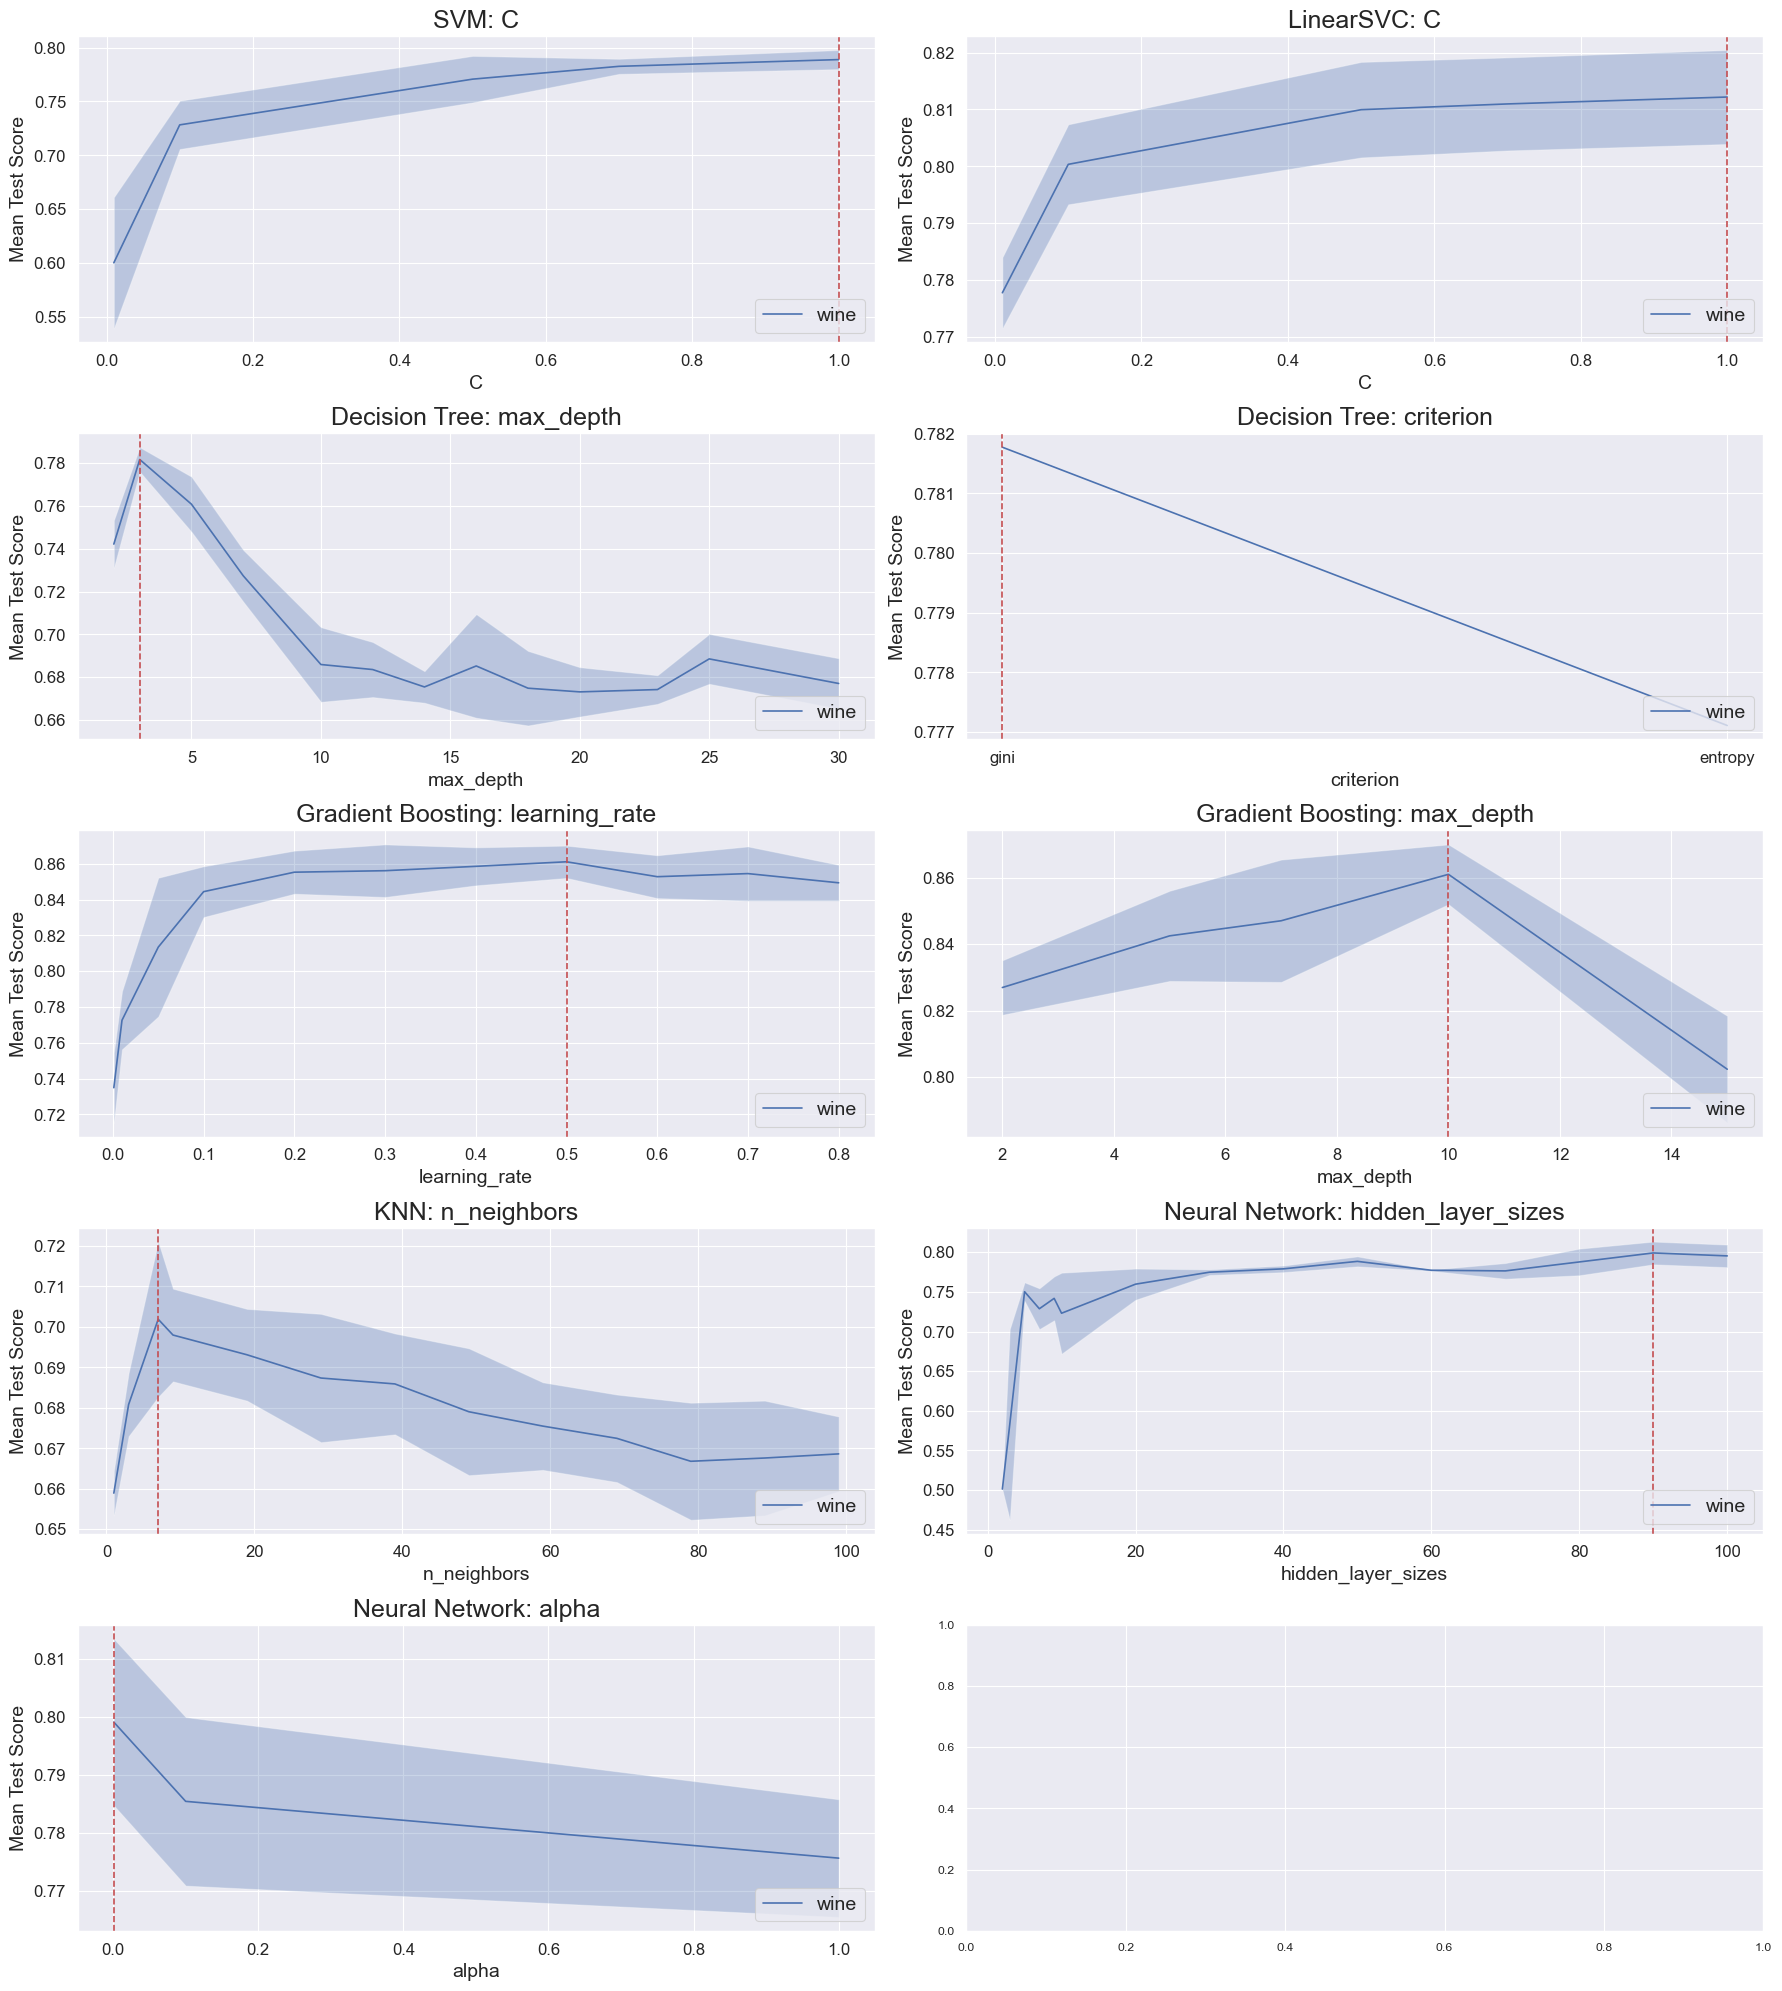

In [228]:

sns.set_theme()
sns.set_context('paper')
fig, axs = plt.subplots(5, 2, figsize=(18, 20))
for i, (model, param) in enumerate(model_params):
    model_results = grid_wine[model]
    
    if model == 'Neural Network':
        model_results = model_results[model_results['param_hidden_layer_sizes'].apply(len) == 1]
        model_results['param_hidden_layer_sizes'] = model_results['param_hidden_layer_sizes'].apply(lambda x: x[0])
    
    best_params = model_results[model_results['mean_test_score'] == model_results['mean_test_score'].max()]
    best_params = best_params[[c for c in best_params.columns if c.startswith('param_')]]
    best_param = best_params['param_{}'.format(param)].iloc[0]
    best_params = best_params.drop(columns=['param_{}'.format(param)]).iloc[0].to_dict()
    
    # filter model results to only show the best hyperparameters from best_params
    for k, v in best_params.items():
        model_results = model_results[model_results[k] == v]
       
    
    sns.lineplot(x='param_{}'.format(param), y=metric, hue='dataset', 
                 data=model_results, ax=axs[i//2, i%2], markers=True, errorbar=None)
    
    try:
        axs[i//2, i%2].fill_between(np.array(model_results['param_{}'.format(param)], dtype=float),
                        (model_results['mean_test_score'] - model_results['std_test_score']).to_numpy(), 
                        (model_results['mean_test_score'] + model_results['std_test_score']).to_numpy(), alpha=0.3)
    except ValueError:
        pass
    
    axs[i//2, i%2].set_title('{}: {}'.format(model, param), fontsize=large_fontsize)
    axs[i//2, i%2].set_xlabel(param, fontsize=small_fontsize)
    axs[i//2, i%2].set_ylabel('Mean Test Score', fontsize=small_fontsize)
    axs[i//2, i%2].tick_params(axis='both', labelsize=tick_fontsize)
    axs[i//2, i%2].legend(loc='lower right', fontsize=small_fontsize)
    axs[i//2, i%2].axvline(best_param, color='r', linestyle='--')

plt.tight_layout()
plt.savefig('hyperparam_tuning_wine.png', dpi=400)

In [164]:
grid_churn['SVM']

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,model,dataset
0,0.048777,0.002709,0.013484,0.002541,0.01,{'C': 0.01},0.672173,0.691897,0.487903,0.617324,0.091868,5,SVM,churn
1,0.047997,0.008648,0.006606,0.000244,0.1,{'C': 0.1},0.635154,0.599640,0.714876,0.649890,0.048185,4,SVM,churn
2,0.029892,0.002565,0.006613,0.000912,0.5,{'C': 0.5},0.674553,0.645307,0.762923,0.694261,0.049998,2,SVM,churn
3,0.028959,0.000239,0.009709,0.002980,0.7,{'C': 0.7},0.674553,0.735328,0.762923,0.724268,0.036915,1,SVM,churn
4,0.036382,0.004376,0.006014,0.000313,1,{'C': 1},0.758502,0.680674,0.641518,0.693565,0.048621,3,SVM,churn


In [169]:
grid_churn['Neural Network'][(grid_churn['Neural Network']['param_hidden_layer_sizes'] == (2,))]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_alpha,param_hidden_layer_sizes,param_solver,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,model,dataset
0,0.071433,0.001091,0.001343,0.000026,relu,0.001,"(2,)",adam,"{'activation': 'relu', 'alpha': 0.001, 'hidden...",0.500000,0.508065,0.495020,0.501028,0.005375,72,Neural Network,churn
24,0.066418,0.006547,0.001398,0.000108,relu,0.1,"(2,)",adam,"{'activation': 'relu', 'alpha': 0.1, 'hidden_l...",0.617470,0.799845,0.760979,0.726098,0.078433,60,Neural Network,churn
48,0.057623,0.019842,0.001376,0.000058,relu,1,"(2,)",adam,"{'activation': 'relu', 'alpha': 1, 'hidden_lay...",0.593811,0.508065,0.514672,0.538849,0.038957,71,Neural Network,churn
